<h2>Josh Vrylle Castillo</h2>
<h3>Data Analysis on Accidents</h3>

<h3>Installing and Importing Modules</h3>

In [1]:
pip install numpy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
from scipy.stats import f_oneway

In [8]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [9]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [10]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h3>Cleaning the Null Values</h3>

In [11]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [12]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('Unaccounted Road Conditions')
accident['Road_Type'] = accident['Road_Type'].fillna('Unaccounted Road Type')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna('Unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('Unaccounted Weather Cobditions')
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])

In [13]:
# accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
# accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
# accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
# accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])
# accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
# accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])

<h3>Cleaning the Data Types</h3>

In [14]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [15]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')

<h3>Modifying the Date</h3>

In [16]:
accident['Accident Date'] = accident['Accident Date'].str.strip()

accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [17]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors = 'coerce')

In [18]:
accident['Year'] = accident['Accident Date'].dt.year.astype('category')
accident['Month'] = accident['Accident Date'].dt.month.astype('category')
accident['Day'] = accident['Accident Date'].dt.day.astype('category')
accident['DaysOfWeek'] = accident['Accident Date'].dt.dayofweek

accident['DaysOfWeek'] = accident['DaysOfWeek'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
accident['Month'] = accident['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [19]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DaysOfWeek                 0
dtype: int64

In [20]:
accident_2019 = accident[accident['Year'] == 2019]
accident_2020 = accident[accident['Year'] == 2020]
accident_2021 = accident[accident['Year'] == 2021]
accident_2022 = accident[accident['Year'] == 2022]

In [27]:
accident_january = accident[accident['Month'] == 'January']
accident_february = accident[accident['Month'] == 'February']
accident_march = accident[accident['Month'] == 'March']
accident_april = accident[accident['Month'] == 'April']
accident_may = accident[accident['Month'] == 'May']
accident_june = accident[accident['Month'] == 'June']
accident_july = accident[accident['Month'] == 'July']
accident_august = accident[accident['Month'] == 'August']
accident_september = accident[accident['Month'] == 'September']
accident_october = accident[accident['Month'] == 'October']
accident_november = accident[accident['Month'] == 'November']
accident_december = accident[accident['Month'] == 'December']

<h1>Valuable Insights</h1>

<h2>Question: Which factors contributes to the most Slight accidents? ( Light Conditions, Road Surface Conditions, Weather Conditions )</h2>

In [28]:
accident.groupby(['Accident_Severity','Light_Conditions'],observed=False).size().unstack()

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_Severity,,,,,
Fatal,68,1860,45,1612,5076
Serious,794,19130,360,7174,60759
Slight,5622,108345,2138,28651,419045


In [29]:
slight = accident[accident['Accident_Severity'] == 'Slight'].value_counts().sum()
slight

563801

In [30]:
accident[(accident['Accident_Severity'] == 'Slight')&(accident['Light_Conditions'] == 'Daylight')].value_counts().sum()


419045

In [31]:
419045 / slight

0.743249834604763

In [ ]:
slight_and_lightcond = accident[accident['Accident_Severity'] == 'Slight']

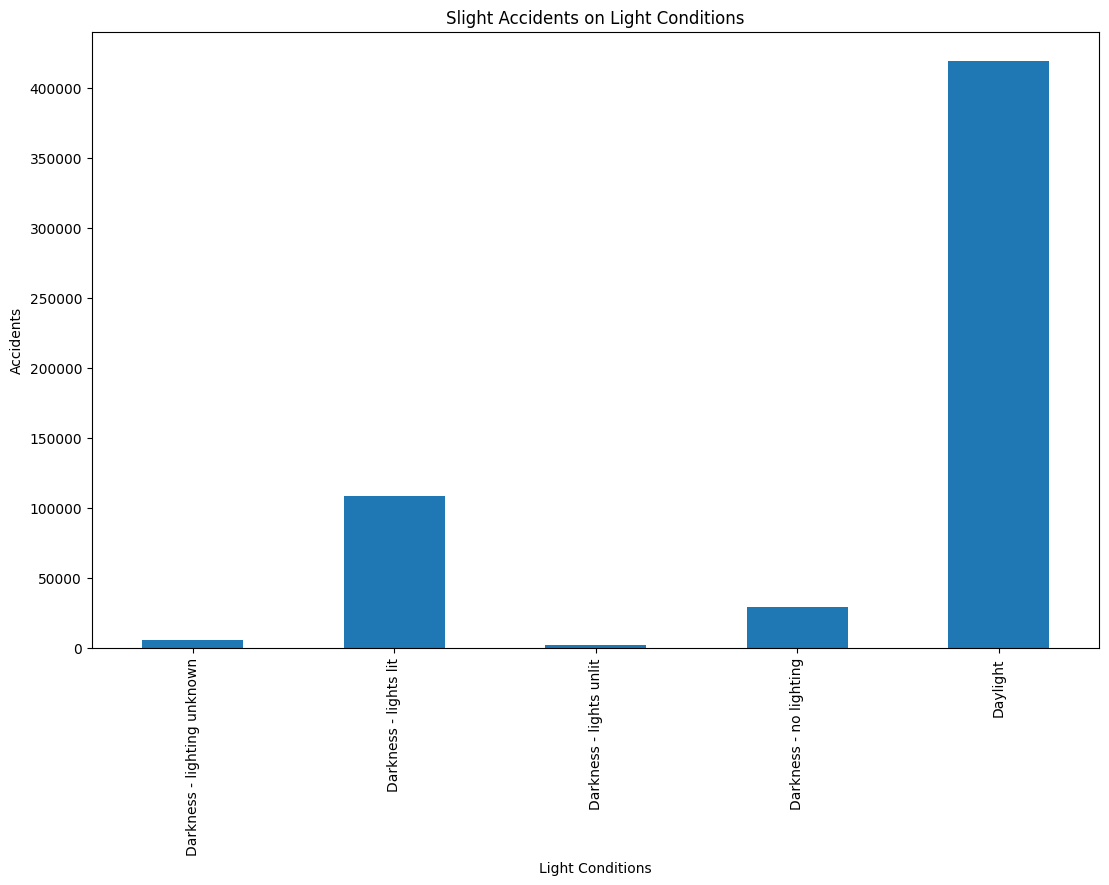

In [54]:
slight_and_lightcond = accident[accident['Accident_Severity'] == 'Slight']

slight_in_lightcond = slight_and_lightcond.groupby(['Light_Conditions']).size()
slight_in_lightcond.plot(kind='bar')
plt.title('Slight Accidents on Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 1: Daylight is the leading light condition that causes the most slight accidents from 2019 to 2022. 74.32% of the Slight accidents comes from Daylight condition.</h3>

In [33]:
accident.groupby(['Accident_Severity','Road_Surface_Conditions'],observed=False).size().unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Unaccounted Road Conditions,Wet or damp
Accident_Severity,,,,,,
Fatal,5788,23,193,35,2,2620
Serious,61638,152,2007,565,70,23785
Slight,380395,842,16317,5290,654,160303


In [34]:
accident[(accident['Accident_Severity'] == 'Slight')&(accident['Road_Surface_Conditions'] == 'Dry')].value_counts().sum()

380395

In [35]:
381049 / slight

0.6758572616933989

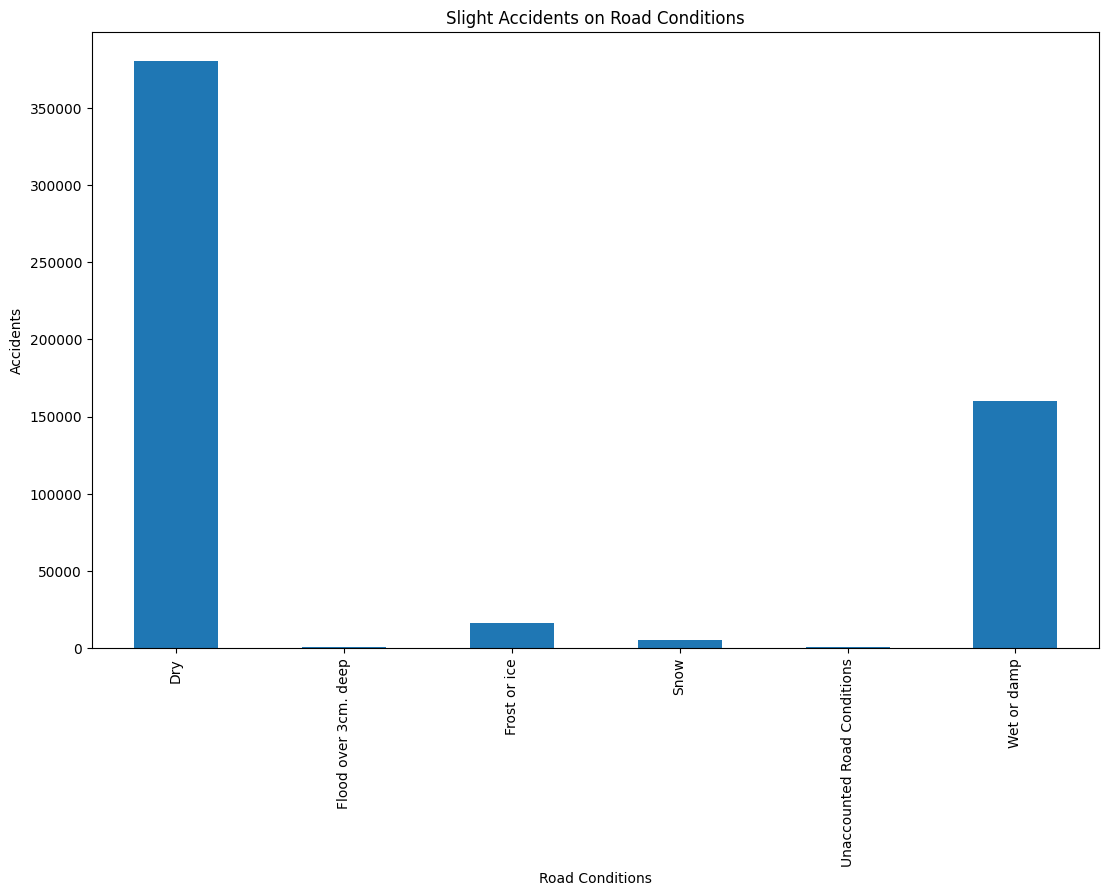

In [36]:
slight_and_roadcond = accident[accident['Accident_Severity'] == 'Slight']

slight_in_roadcond = slight_and_roadcond.groupby(['Road_Surface_Conditions']).size()
slight_in_roadcond.plot(kind='bar')
plt.title('Slight Accidents on Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 2: Dry is the leading road condition that causes the most slight accidents from 2019 to 2022. 67.59% of the Slight accidents comes from Dry road condition. </h3>

In [37]:
accident.groupby(['Accident_Severity','Weather_Conditions'],observed=False).size().unstack()

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Unaccounted Weather Cobditions
Accident_Severity,,,,,,,,,
Fatal,175,7100,82,165,145,848,3,36,107
Serious,1245,72046,483,1801,1261,9468,109,565,1239
Slight,7134,441739,2963,15184,8209,69380,773,5637,12782


In [38]:
accident[(accident['Accident_Severity'] == 'Slight')&(accident['Weather_Conditions'] == 'Fine no high winds')].value_counts().sum()

441739

In [39]:
454521 / slight

0.8061727453480927

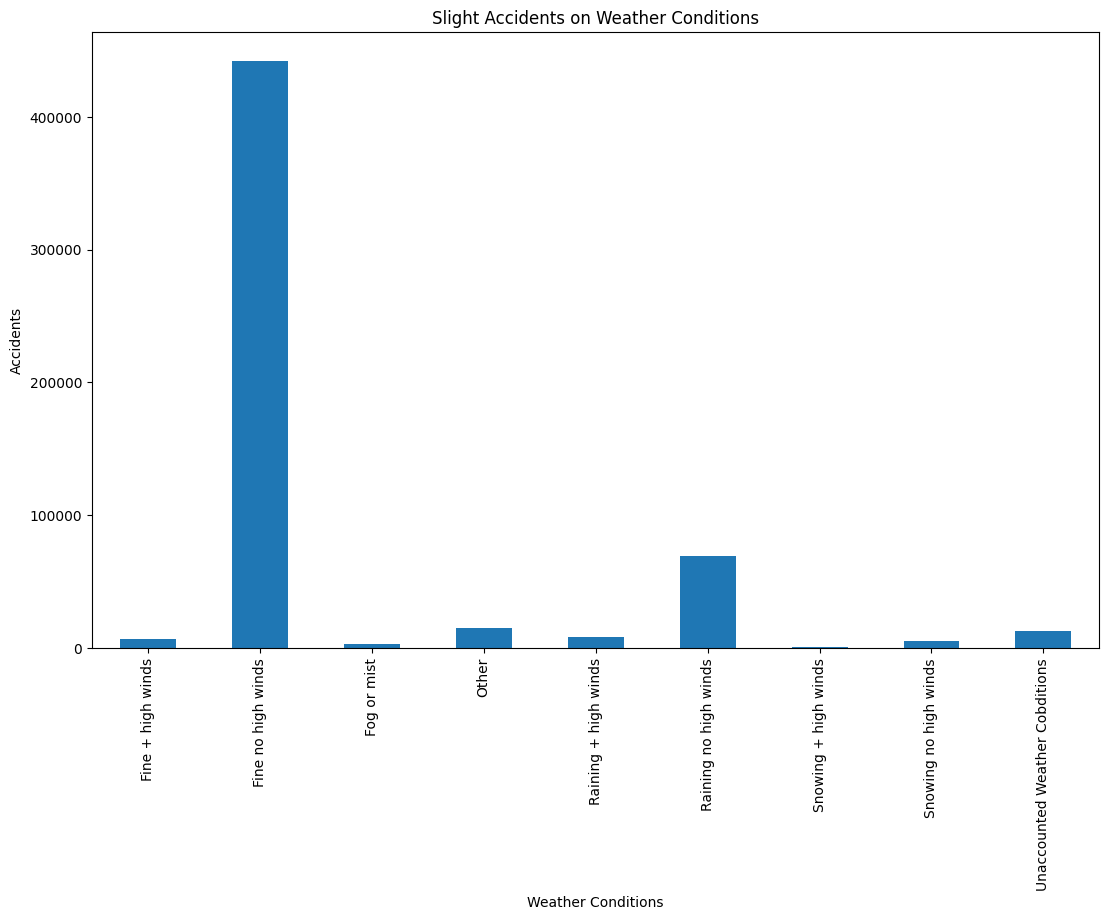

In [40]:
slight_and_weathercond = accident[accident['Accident_Severity'] == 'Slight']

slight_in_weathercond = slight_and_weathercond.groupby(['Weather_Conditions']).size()
slight_in_weathercond.plot(kind='bar')
plt.title('Slight Accidents on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 3: Fine no high winds is the leading weather condition that causes the most slight accidents from 2019 to 2022. 80.61% of the Slight accidents comes from Fine no high winds weather condition.</h3>

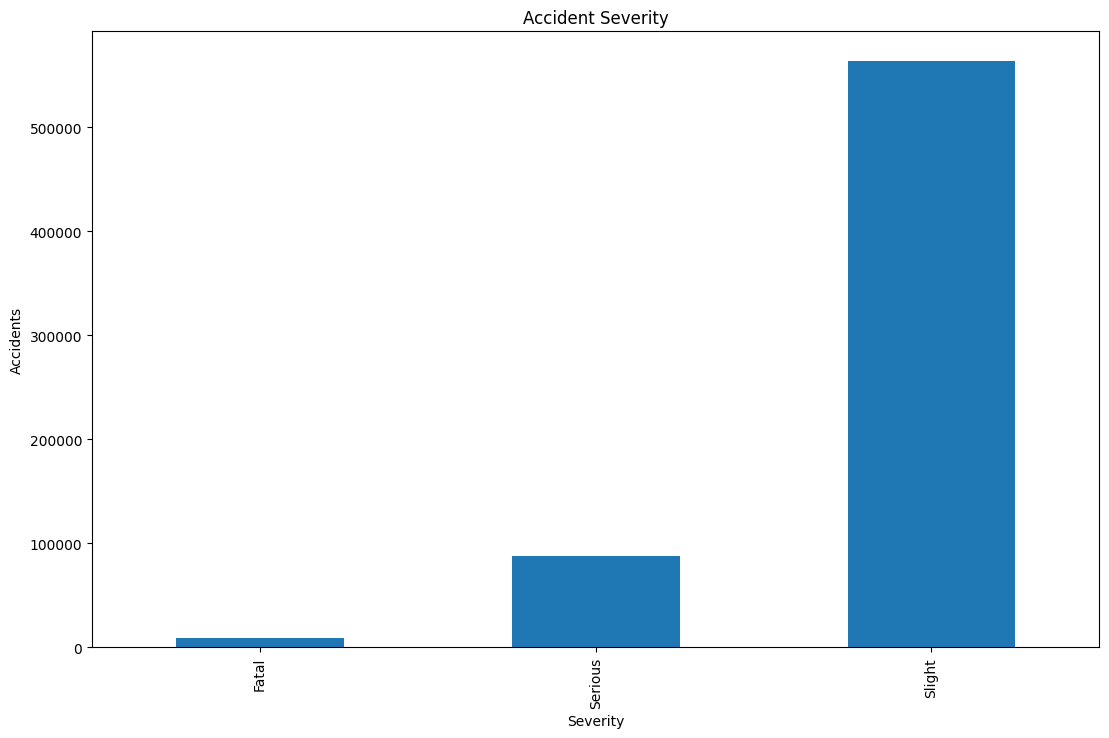

In [41]:

accident_severity = accident.groupby(['Accident_Severity']).size()
accident_severity.plot(kind='bar')
plt.title('Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 4: According to the data above, the highest accident severity is slight, followed by serious and fatal, respectively. The most common conditions for the Slight accidents are the following: 74.32% for Daylight, 67.58% for Dry roads, and 80.61% for Fine no high winds weather. This means that you are most prone to slight accidents while in the most ideal weather(fine no high winds), road condition(dry), and light condition(daylight).</h3>

<h2>Question: From the data gathered above. Slight accidents happen during the most ideal weather conditions. Does the same concept happen to Serious accidents? What about Fatal accidents? </h2>

In [42]:
accident.groupby(['Accident_Severity','Light_Conditions'],observed=False).size().unstack()

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_Severity,,,,,
Fatal,68,1860,45,1612,5076
Serious,794,19130,360,7174,60759
Slight,5622,108345,2138,28651,419045


In [43]:
accident.groupby(['Accident_Severity','Road_Surface_Conditions'],observed=False).size().unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Unaccounted Road Conditions,Wet or damp
Accident_Severity,,,,,,
Fatal,5788,23,193,35,2,2620
Serious,61638,152,2007,565,70,23785
Slight,380395,842,16317,5290,654,160303


In [44]:
accident.groupby(['Accident_Severity','Weather_Conditions'],observed=False).size().unstack()

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Unaccounted Weather Cobditions
Accident_Severity,,,,,,,,,
Fatal,175,7100,82,165,145,848,3,36,107
Serious,1245,72046,483,1801,1261,9468,109,565,1239
Slight,7134,441739,2963,15184,8209,69380,773,5637,12782


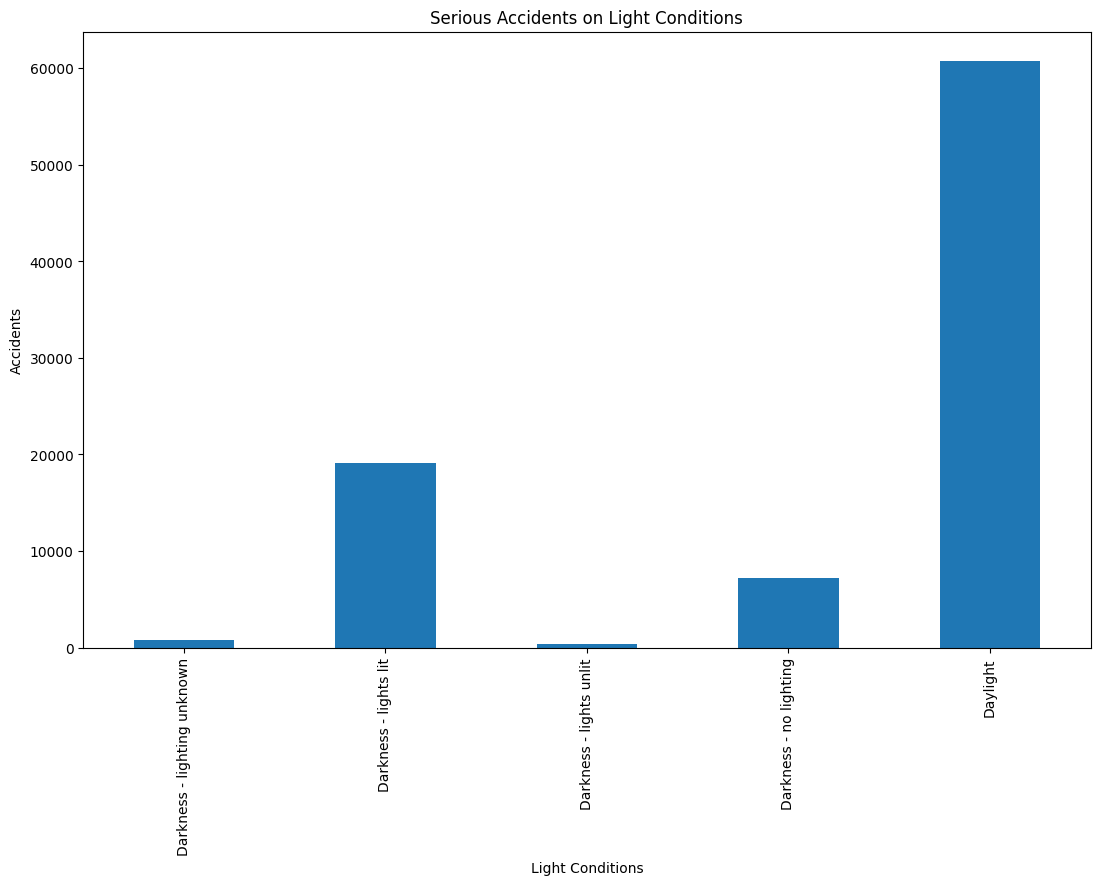

In [45]:
serious_and_lightcond = accident[accident['Accident_Severity'] == 'Serious']

serious_in_lightcond = serious_and_lightcond.groupby(['Light_Conditions']).size()
serious_in_lightcond.plot(kind='bar')
plt.title('Serious Accidents on Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

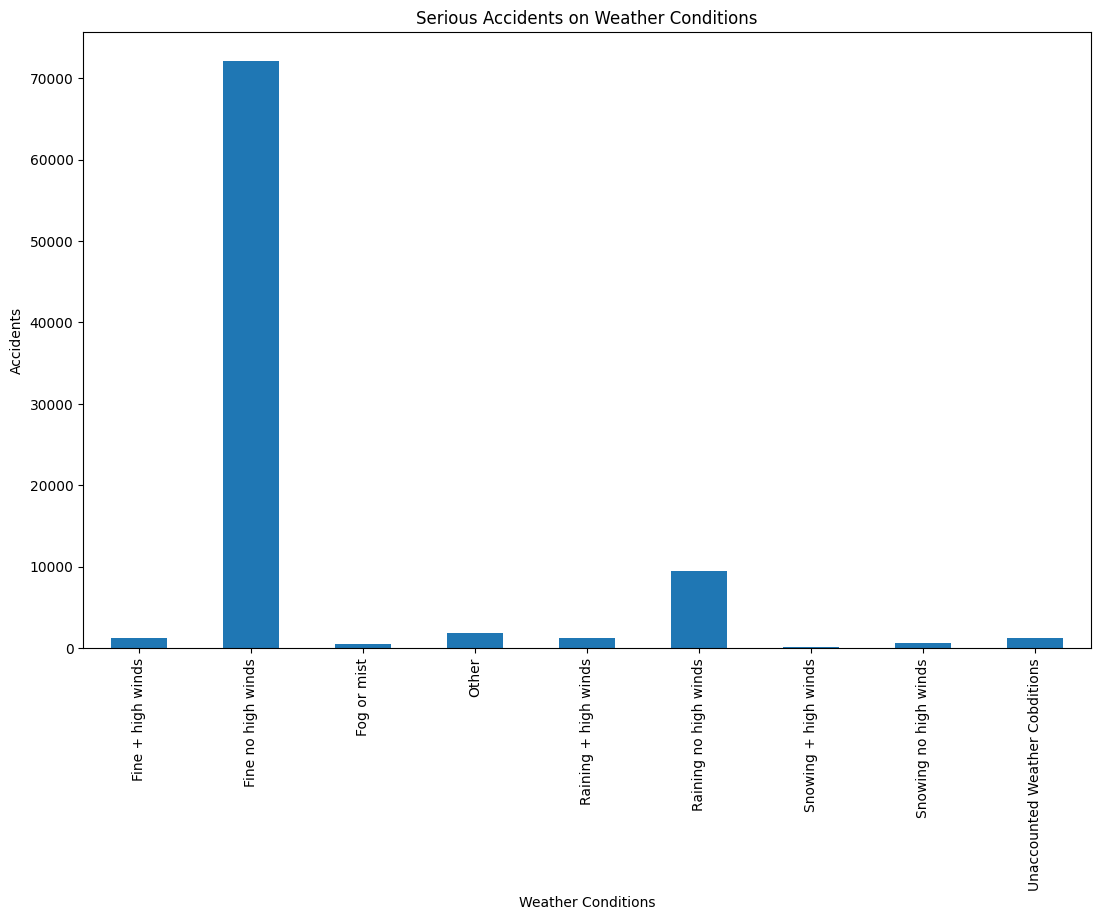

In [46]:
serious_and_weathercond = accident[accident['Accident_Severity'] == 'Serious']

serious_in_weathercond = serious_and_weathercond.groupby(['Weather_Conditions']).size()
serious_in_weathercond.plot(kind='bar')
plt.title('Serious Accidents on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

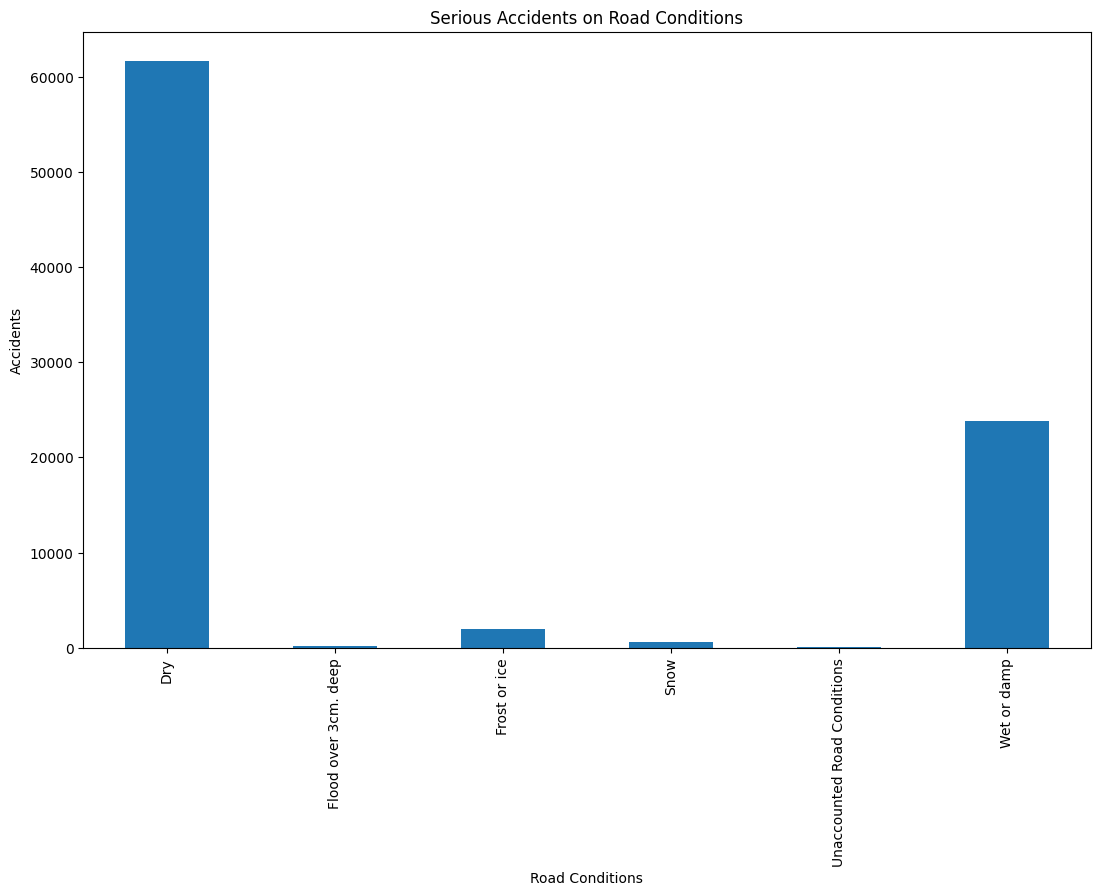

In [47]:
serious_and_roadcond = accident[accident['Accident_Severity'] == 'Serious']

serious_in_roadcond = serious_and_roadcond.groupby(['Road_Surface_Conditions']).size()
serious_in_roadcond.plot(kind='bar')
plt.title('Serious Accidents on Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 5: The conditions that causes the most Serious accidents are the following: daylight(light condition), dry(road condition), and Fine no winds(weather condition)</h3>

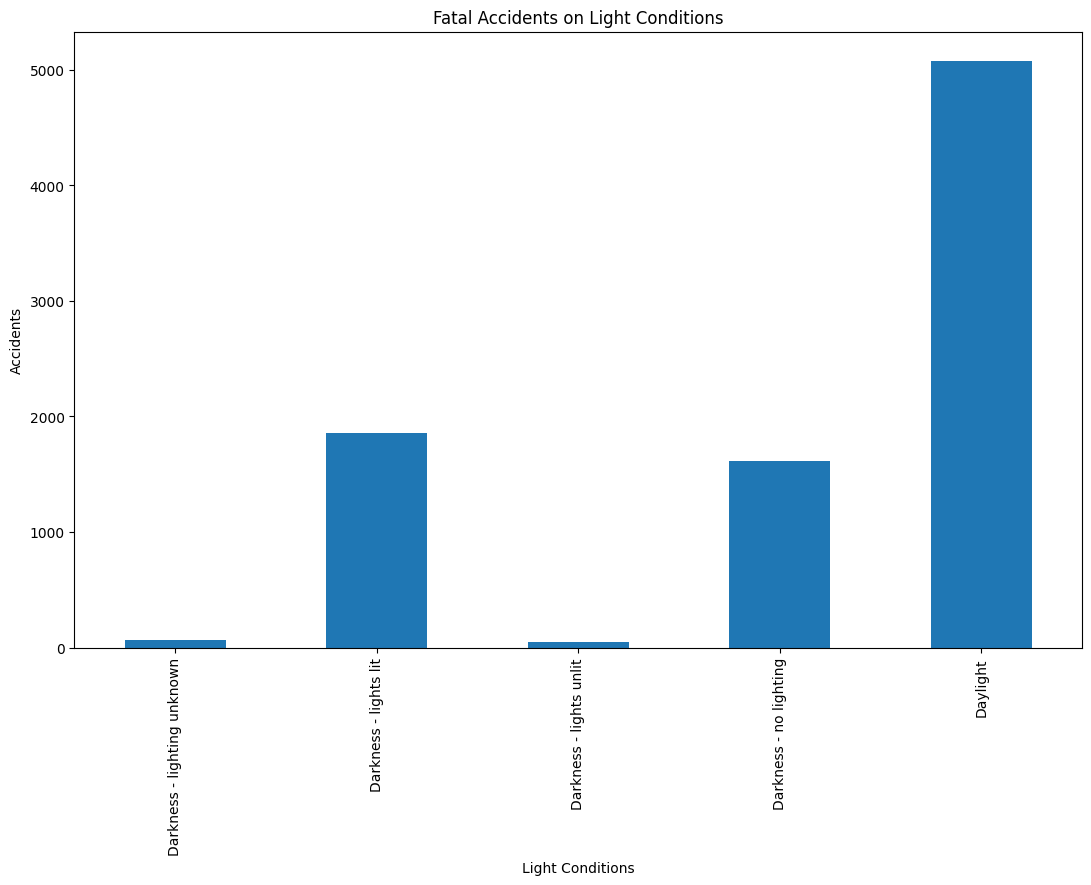

In [48]:
fatal_and_lightcond = accident[accident['Accident_Severity'] == 'Fatal']

fatal_in_lightcond = fatal_and_lightcond.groupby(['Light_Conditions']).size()
fatal_in_lightcond.plot(kind='bar')
plt.title('Fatal Accidents on Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

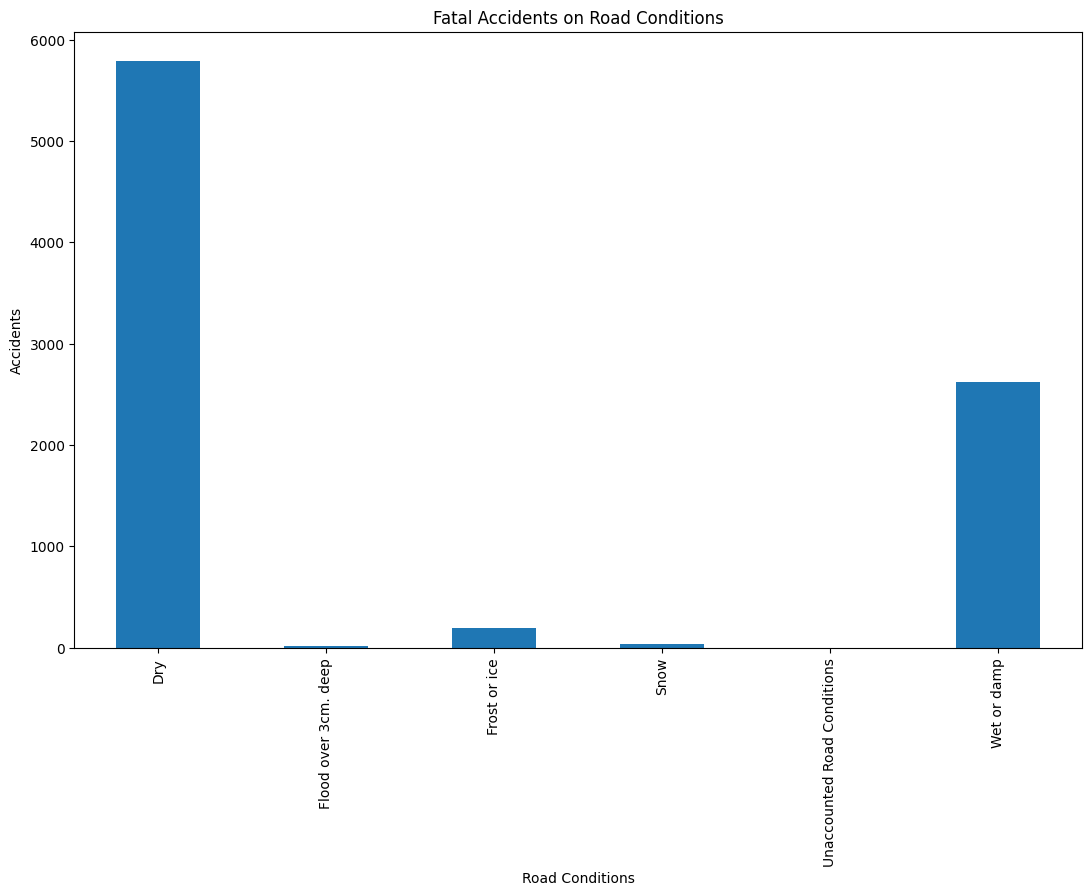

In [49]:
fatal_and_roadcond = accident[accident['Accident_Severity'] == 'Fatal']

fatal_in_roadcond = fatal_and_roadcond.groupby(['Road_Surface_Conditions']).size()
fatal_in_roadcond.plot(kind='bar')
plt.title('Fatal Accidents on Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

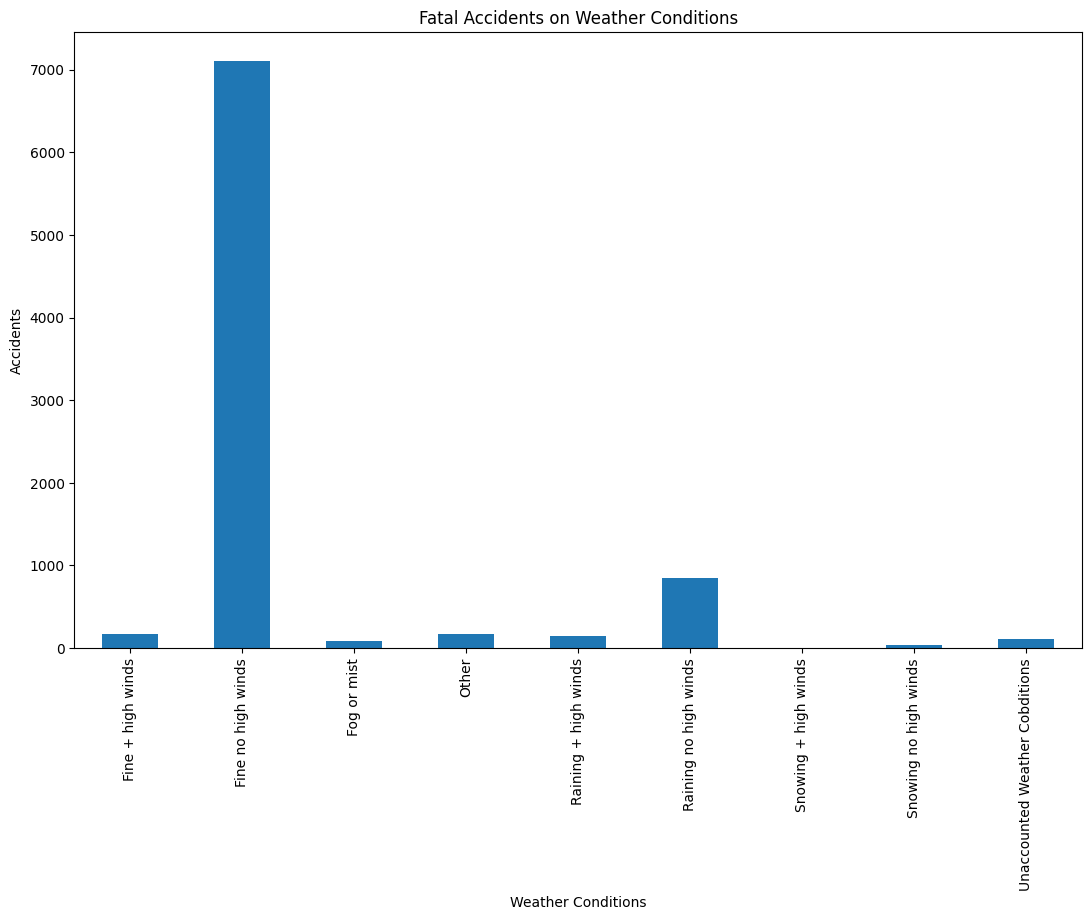

In [50]:
fatal_and_weathercond = accident[accident['Accident_Severity'] == 'Fatal']

fatal_in_weathercond = fatal_and_weathercond.groupby(['Weather_Conditions']).size()
fatal_in_weathercond.plot(kind='bar')
plt.title('Fatal Accidents on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 6: The conditions that causes the most Fatal accidents are the following: daylight(light condition), dry(road condition), and Fine no winds(weather condition)</h3>

<h3>Insight 7: Answering the previous question. Surprisingly, the same concept applies to Serious and Fatal accidents. We can conclude that the 'ideal conditions' can cause the most accidents. We all know that in unideal conditions such as having fogs, snows, wet roads, and very dim roads, it is very dangerous to go outside. One possible reason why more accidents happen during ideal conditions is because there are more people outside, thus higher probability of them being in an accident. When an unideal condition is present like a typhoon, people tends to stay indoors, making them safer.</h3>

In [51]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DaysOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,June,5,Wednesday
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,July,2,Tuesday
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Unaccounted Road Type,Urban,Unaccounted Weather Cobditions,Taxi/Private hire car,2019,August,26,Monday
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,August,16,Friday
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Unaccounted Road Type,Urban,Unaccounted Weather Cobditions,Other vehicle,2019,September,3,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,February,18,Friday
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,February,21,Monday
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,February,23,Wednesday
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,February,23,Wednesday


<h2>Question: Since we found out that ideal conditions makes you more prone to accidents. Where does all these accidents usually occur despite the influence of other conditions? Find out whether there are more accidents on Urban or Rural areas. </h2>

In [52]:
urban = accident[accident['Urban_or_Rural_Area'] == 'Urban']
rural = accident[accident['Urban_or_Rural_Area'] == 'Rural']

In [53]:
urban.value_counts().sum()

421663

In [ ]:
rural.value_counts().sum()

In [ ]:
total_urban_rural = accident['Urban_or_Rural_Area'].value_counts().sum()
total_urban_rural

In [ ]:
421663/ total_urban_rural

In [ ]:
238990/total_urban_rural

In [ ]:
63.82 + 36.17


In [ ]:
1 - 0.9999606465469616

In [ ]:
urban_or_rural = accident['Urban_or_Rural_Area'].value_counts()
urban_or_rural

In [ ]:
mylabels = ['urban', 'rural','','']

plt.pie(urban_or_rural, labels = mylabels)
plt.title('Urban or Rural')
plt.show()

<h3>Insight 8: 63.82% of the accidents happen in Urban areas. 36.17% of the accidents happens in Rural areas. The remaining 0.01% are unaccounted for. This means that there are more accidents in places where there are more people present.</h3> 

<h2>Question: For the accidents in Urban areas, what are the top 5 vehicle types that causes the most accidents? What about the Rural areas?</h2>

In [ ]:
accident['Vehicle_Type'].value_counts()

In [ ]:
urban['Vehicle_Type'].value_counts()

In [ ]:
rural['Vehicle_Type'].value_counts()

In [ ]:
accident

In [ ]:
urban_and_vehicletype = accident[accident['Urban_or_Rural_Area'] == 'Urban']

urban_in_vehicletype = urban_and_vehicletype.groupby(['Vehicle_Type']).size()
urban_in_vehicletype.plot(kind='bar')
plt.title('Accidents by Vehicle Type in Urban Areas')
plt.xlabel('Vehicle Types')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 9: The top 5 vehicle type that causes the most accident on Urban Areas are the following: Car, Van / Goods 3.5 tonnes mgw or under, Bus or coach (17 or more pass seats), Motorcycle over 500cc, and Goods 7.5 tonnes mgw and over.</h3>

In [ ]:
rural_and_vehicletype = accident[accident['Urban_or_Rural_Area'] == 'Rural']

rural_in_vehicletype = rural_and_vehicletype.groupby(['Vehicle_Type']).size()
rural_in_vehicletype.plot(kind='bar')
plt.title('Accidents by Vehicle Type in Rural Areas')
plt.xlabel('Vehicle Types')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 10: The top 5 vehicle type that causes the most accident on Rural Areas are the following: Car, Van / Goods 3.5 tonnes mgw or under, Bus or coach (17 or more pass seats), Motorcycle over 500cc, and Goods 7.5 tonnes mgw and over.</h3>

<h3>Insight 11: Despite being whole different areas, Urban and Rural areas have the same leading type of vehicles in causing accidents. This might indicate that the vehicle type that is much largely produced can cause the most accidents. The most common type of vehicle in United Kingdom are cars and vans, and they are the leading vehicle types for accidents. </h3>

<h2>Question: Using the oldest data availlable in the dataframe, can you find the total percentage and exact amount of the fatalities?</h2>

In [ ]:
accident_2019 = accident[accident['Year'] == 2019]
accident_2019['Accident_Severity'].value_counts()

In [ ]:
accident_2019['Accident_Severity'].value_counts().sum()

In [ ]:
2714 /144419

In [ ]:

fatal_2019 = accident_2019.groupby(['Accident_Severity']).size()
fatal_2019.plot(kind='bar')
plt.title('Accidents Severity in 2019')
plt.xlabel('Accident Severity')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 12: In year 2019, 1.87% of the accidents are fatal with a number 2714 occurences.</h3>

<h2>Question: What about using the most recent data availlable in the dataframe, can you find the total percentage and exact amount of the fatalities?</h2>

In [ ]:
accident_2022 = accident[accident['Year'] == 2022]
accident_2022['Accident_Severity'].value_counts()

In [ ]:
accident_2022['Accident_Severity'].value_counts().sum()

In [ ]:
1549 / 144419

In [ ]:
fatal_2022 = accident_2022.groupby(['Accident_Severity']).size()
fatal_2022.plot(kind='bar')
plt.title('Accidents Severity in 2022')
plt.xlabel('Accident Severity')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 13: In year 2022, 1.07% of the accidents are fatal with a number 1549 occurences.</h3>

<h3>Insight 14: Based on the analysis about Fatal accidents. We found out that they have significantly less numbers than that of Slight and Serious accidents combined with only less than 2% occurences. In comparison between the year 2019 and 2022, there are less fatal accidents in the recent years compared to older years. </h3>

<h2>Question: Using the data from 2022, What months causes the most overall accidents? What about the average accidents per month?</h2>

In [ ]:
accident_2022.groupby(['Accident_Severity','Month'], observed=False).size().unstack()

In [ ]:
accident_2022.groupby(['Accident_Severity','Month'], observed=False).size().unstack().sum()

In [ ]:
line_2022 = accident_2022.groupby(['Month']).size()

plt.plot(line_2022, marker='o')
plt.title("Accident rate per Month during 2022")
plt.ylabel("Accidents")
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 15: The month with the highest accident rate during 2022 is November, closely followed by October, with only a margin of 88 accidents. This occurence might be due to Halloween event every November.</h3>

<h3>Insight 16: The month with the lowest accident rate during 2022 is December, followed closely by January, and then relatively followed by February. These are the months where most people are usually on vacation.</h3>

<h2>Question: Since November and October is the month where there is the highest accidents. Does the Halloween have to do with this? Halloween is celebrated during October 31, for some people it extends to early November 1.</h2>

In [ ]:
accident_2022.groupby(['Day','Month'], observed=False).size().unstack()

In [ ]:
accident_2022.groupby(['Day','Month'], observed=False).size().unstack()

In [ ]:
accident_2022.groupby(['Month']).size()

oct_2022 = accident_2022[accident_2022['Month'] == "October"]
nov_2022 = accident_2022[accident_2022['Month'] == 'November']


In [ ]:
df_oct_2022 = oct_2022.groupby(['Day']).size()
df_oct_2022.plot(kind='bar')
plt.title('October 2022')
plt.xlabel('Days')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

In [ ]:
df_nov_2022 = nov_2022.groupby(['Day']).size()
df_nov_2022.plot(kind='bar')
plt.title('November 2022')
plt.xlabel('Days')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 17: In October 31, There are 344 accidents. In November 1, there 432 accidents. The Day in October and November which has the highest accidents is October 1 and November 5. This means that Halloween event does not heighten the amount of accidents. But, it does lower the accident rate for October 31, the start of Halloween.

In [ ]:
accident

<h2>Question: Using the recent years from 2020 to 2022, Which District Area is most prone to accidents? </h2>

In [ ]:
accident_2019 = accident[accident['Year'] == 2019]
accident_2020 = accident[accident['Year'] == 2020]
accident_2021 = accident[accident['Year'] == 2021]
accident_2022 = accident[accident['Year'] == 2022]

In [ ]:
district_2022 = accident_2020['District Area'].value_counts()

In [ ]:
line_2022 = accident_2022.groupby(['Month']).size()

In [ ]:
accident_2021['District Area'].value_counts()

In [ ]:
accident_2022['District Area'].value_counts()

<h3>Insight 18: The district that is most prone to accidents is Birmingham, followed by Leeds, and Manchester.</h3>

<h3>Question: From the data frame, what is the Road Type that causes the most accidents?</h3>

In [ ]:
roadtype = accident['Road_Type'].value_counts()

In [ ]:
total = accident['Road_Type'].value_counts().sum()

In [ ]:
accident.groupby(['Accident_Severity','Road_Type'], observed=False).size().unstack()

In [ ]:
roadtype / total

In [ ]:
road_type = accident.groupby(['Road_Type']).size()
road_type.plot(kind='bar')
plt.title('Most accident prone road type')
plt.xlabel('Road Type')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 19: The road type that has the highest accident is Single carriageway. Single Carriageway causes 74% of the accidents.</h3>

<h2>Question: Which Day of the week has the most amount of accidents?</h2>

In [ ]:
accident['DaysOfWeek'].value_counts()

In [ ]:
daysofweek = accident.groupby(['DaysOfWeek']).size()
daysofweek.plot(kind='bar')
plt.title('Days of week that has the most accidents')
plt.xlabel('Days of Week')
plt.ylabel('Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insight 20: The day of the week that has the most accidents is Saturday. This might be because more people are going out to relax or spend time out of work. Causing them to travel and go outside which makes them prone to higher chances of accidents.
</h3>